<a href="https://colab.research.google.com/github/GeoAI4GlobalChange/Teaching/blob/main/FWE375_Spring2023/helloShap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 28.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import shap
import sklearn

Explaining a linear regression model
Before using Shapley values to explain complicated models, it is helpful to understand how they work for simple models. One of the simplest model types is standard linear regression, and so below we train a linear regression model on the California housing dataset. This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:


1.   MedInc - median income in block group
1.   HouseAge - median house age in block group
2.   AveRooms - average number of rooms per household
3.   Population - block group population
4.   AveBedrms - average number of bedrooms per household
2.   AveOccup - average number of household members
3.   Latitude - block group latitude
4.   Longitude - block group longitude

In [10]:
# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
X.shape,y.shape

((1000, 8), (1000,))

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


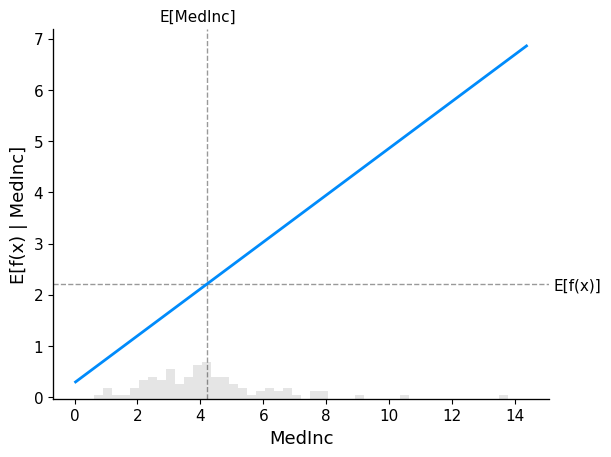

In [16]:
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

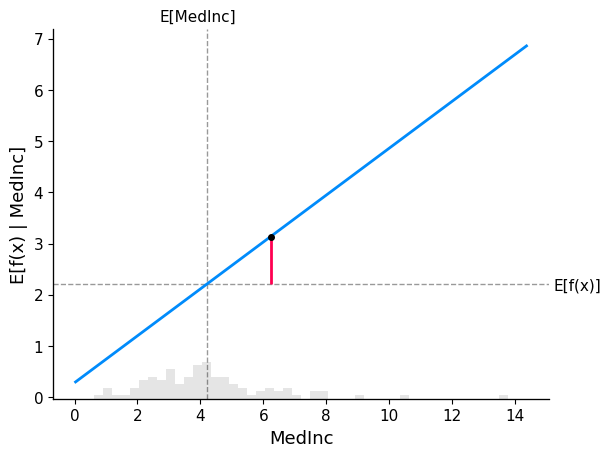

In [13]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [19]:
type(shap_values.values)

numpy.ndarray

In [23]:
import numpy as np
import matplotlib.pyplot as plt
y100=model.predict(X100)
Efx=y100.mean()
Efx

2.214739832711566

In [25]:
shp_sum=np.sum(shap_values.values,axis=1)
y_shp=shp_sum+Efx
y=model.predict(X)
np.min(y-y_shp)

-2.1316282072803006e-14

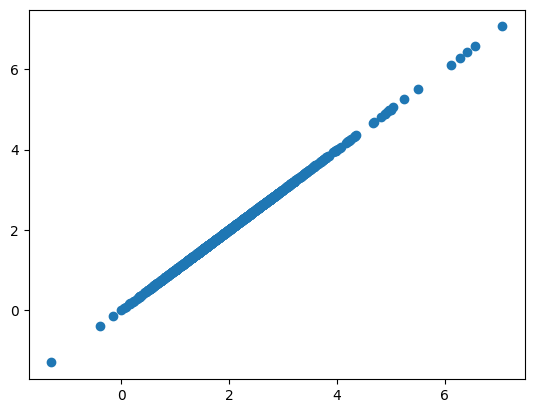

In [26]:
plt.scatter(y_shp,y)
plt.show()

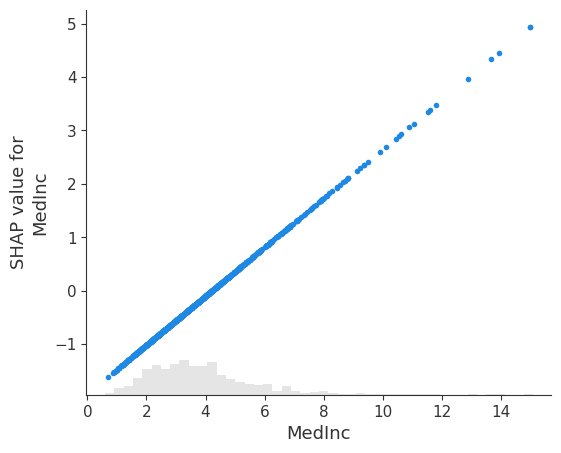

In [27]:
shap.plots.scatter(shap_values[:,"MedInc"])

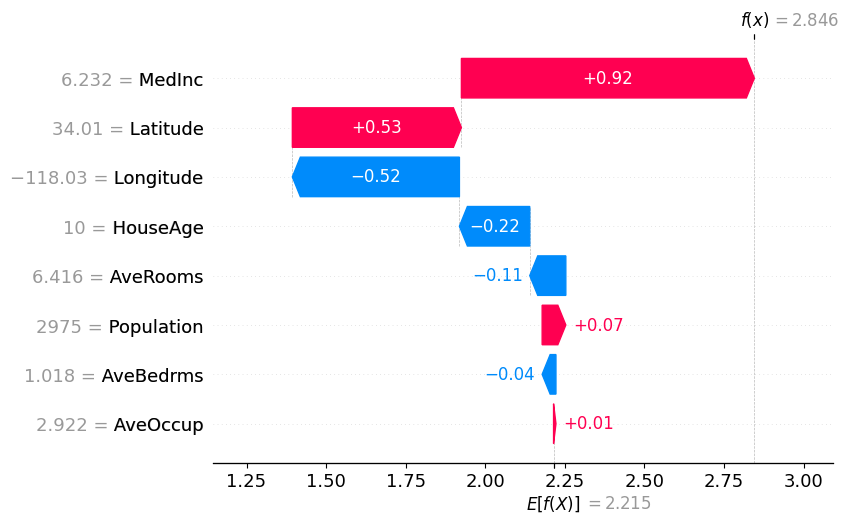

In [9]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)